In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import pandas as pd

In [2]:
df =pd.read_csv('C:/Users/rodri/OneDrive/Documentos/Proyectos Jupiter/TopicosCienciaDatos/train.csv')
print(df.head())

  substation                 date  consumption
0    AJAHUEL  2018-01-01 00:00:00   137.330840
1    AJAHUEL  2018-01-01 01:00:00   124.045549
2    AJAHUEL  2018-01-01 02:00:00   118.137811
3    AJAHUEL  2018-01-01 03:00:00   107.899499
4    AJAHUEL  2018-01-01 04:00:00   100.362069


In [3]:
NomSub = df['substation'].unique()


In [4]:
dfs_AJAHUEL = df[df['substation'] == 'AJAHUEL']
dfs_BUIN = df[df['substation'] == 'BUIN']
dfs_CHENA = df[df['substation'] == 'CHENA']
dfs_CNAVIA = df[df['substation'] == 'CNAVIA']
dfs_ELSALTO = df[df['substation'] == 'ELSALTO']
dfs_FLORIDA = df[df['substation'] == 'FLORIDA']
dfs_LOSALME = df[df['substation'] == 'LOSALME']


In [15]:
xJAhuel=dfs_AJAHUEL["date"].to_numpy()
yJahuel=dfs_AJAHUEL["consumption"].to_numpy()

In [16]:
xbuin=dfs_BUIN["date"].to_numpy()
ybuin = dfs_BUIN["consumption"].to_numpy()

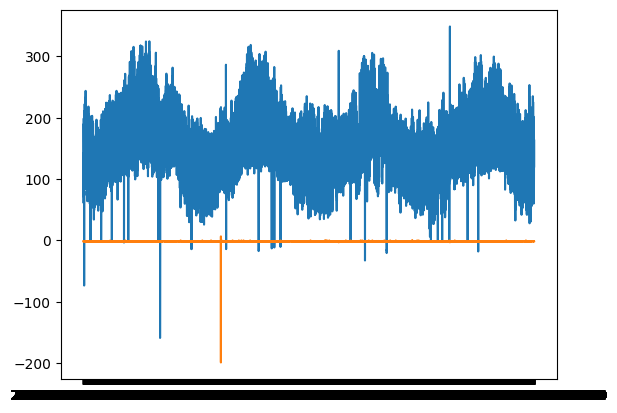

In [17]:
plt.plot(xJAhuel,yJahuel)


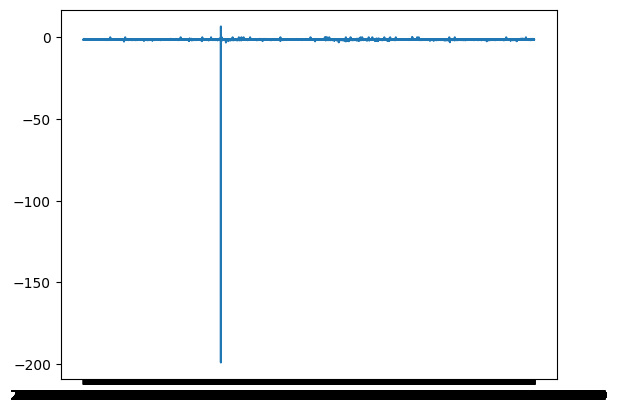

In [18]:
plt.plot(xbuin,ybuin)